In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')

In [2]:
from pyts.datasets import load_gunpoint
from pyts.image import RecurrencePlot, GramianAngularField, MarkovTransitionField

In [3]:
"""
NOTE: the dataset should be scalled in some fashion. In the case of financial data, we should use a minmax scalar, or some non-stationary normalization technique.
"""
x_train, x_test, y_train, y_test = load_gunpoint(return_X_y=True)

In [4]:
"""
shape = (n_samples, n_features), where n_features in univariate
"""
x_train.shape

(50, 150)

In [6]:
"""
instantiating our fields. Each will turn our arrays into images of 24,24 in this case
therefore image_size corresponds to the matrix size. If this is left blank, it will just create
a matrix of feature size for h,w
"""
gaf = GramianAngularField(image_size=24)
mtf = MarkovTransitionField(image_size=24)

In [7]:
# mtf transformation
x_mtf = mtf.fit_transform(x_train)

In [9]:
"""
shape = (n_samples, h,w)
essentially each n_features per sample has been turned into a matrix which is the MTF in this case

In the case of a Conv2d -> each of these will be a single channel.
"""
x_mtf.shape

(50, 24, 24)

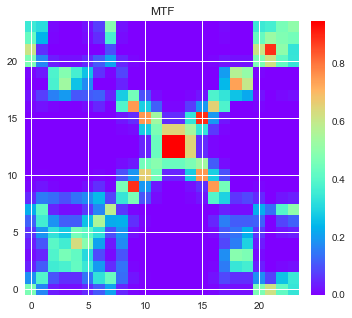

In [17]:
"""
Plotting MTF
"""
plt.figure(figsize=(5,5))
plt.imshow(x_mtf[0], cmap='rainbow', origin='lower')
plt.title('MTF')
plt.colorbar(fraction=0.0457, pad=0.04)
plt.tight_layout()
plt.show()

In [20]:
"""
Instantiating both GASF and GADF, the difference here is the method = [summation, difference]
"""
gasf = GramianAngularField(image_size=24, method='summation')
gadf = GramianAngularField(image_size=24, method='difference')

In [22]:
# fitting both to x_train
x_gasf = gasf.fit_transform(x_train)
x_gadf = gadf.fit_transform(x_train)

In [23]:
x_gasf.shape, x_gadf.shape

((50, 24, 24), (50, 24, 24))

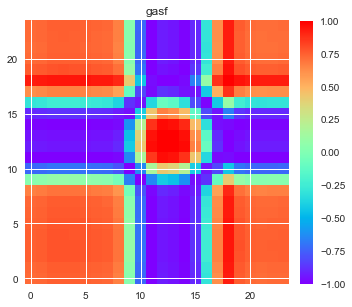

In [24]:
"""
Plotting gasf
"""
plt.figure(figsize=(5,5))
plt.imshow(x_gasf[0], cmap='rainbow', origin='lower')
plt.title('gasf')
plt.colorbar(fraction=0.0457, pad=0.04)
plt.tight_layout()
plt.show()

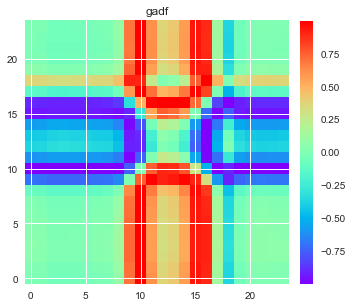

In [25]:
"""
Plotting gadf
"""
plt.figure(figsize=(5,5))
plt.imshow(x_gadf[0], cmap='rainbow', origin='lower')
plt.title('gadf')
plt.colorbar(fraction=0.0457, pad=0.04)
plt.tight_layout()
plt.show()